Lessons from Chapter 7

### Building an OLS Regression Model in Python
Having built statistics functions, we are now ready to build a function for regression analysis. We will start by building the an regression. We will use linear algebra to estimate parameters that minimize the sum of the squared errors. This is an ordinary least squares regression.

An OLS regression with one exogenous variable takes the form.

$y = \alpha + \beta_1x_1 + \mu $

$\beta_0 = \alpha + \mu$

We merge the error term, which represents bias in the data, with alpha to yield the constant, $\beta_0$. This is necessary since OLS assumes an unbiased estimator where:

$\sum_{i=0}^{n-1} e_{i}=0$

Each estimate of a point created from a particular observation takes the form.

$y_i = \beta_0 + \beta_1x_{1,i} + e_i$

This can be generalized to include k exogenous variables:

$y_i = \beta_0 + (\sum_{j=1}^{k} \beta_jx_{i,j}) + e_i$

Ideally, we want to form a prediction where, on average, the right-hand side of the equation yields the correct value on the left-hand side. When we perform an OLS regression, we form a predictor that minimizes the sum of the distance between each predicted value and the observed value drawn from the data. For example, if the prediction for a particular value of y is 8, and the actual value is 10, the error of the prediction is -2 and the squared error is 4.

To find the function that minimizes the sum squared errors, we will use matrix algebra, also known as linear algebra. For those unfamiliar, the next section uses the numpy library to perform matrix operations. For clarity, we will review the linear algebra functions that we will use with simple examples.

### Linear Algebra for OLS in _numpy_
We solve the following function for a vector of beta values ($\beta$), constants whose values represent estimates of the effect of variables in the set X on the selected endogenously generate variable $y$. The matrix X also includes a vector of ones used to estimate the constant $\beta_0$.

To transform matrix $X$ in to $X^{-1}$, we must transform $[XI]$ into $[IX^{-1}]$. This is accomplished in chapter 7 of the textbook. We are going to check the results using *numpy*.

$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

### Inverting a Matrix
In reviewing the linear equation for estimating $\beta$, we confront two unique operations worth understanding. Included in these are some key concepts in linear algebra, including the identity matrix $I$ and linear independence. The best way to understand these concepts is by working with some sample vectors. Consider the matrix $X$ consisting of vectors $x_0$,$x_1$,…,$x_{n-1}$,$x_n$. We must check that these vectors are linearly independent. We do this by joining $X$ with an identity matrix and thus create:

$A = [XI]$

We transform this to show that the product of $A$ and $X^{-1}$ is equal to the product of and an identity matrix, $I$ and $X^{-1}$

$AX^{-1} = [XI]X^{-1}$

$AX^{-1} = [IX^{-1}]$

Let us solve for $AX^{-1}$ using the following vectors for $X$.

$\begin{equation*}
X = \begin{bmatrix}
1 &amp; 2 &amp; 1 \\
4 &amp; 1 &amp; 5 \\
6 &amp; 8 &amp; 6
\end{bmatrix}
\end{equation*}$

Concatenate a 3 X 3 identity matrix on the left of $X$:

$\begin{equation*}
I = \begin{bmatrix}
1 &amp; 0 &amp; 0 \\
0 &amp; 1 &amp; 0 \\
0 &amp; 0 &amp; 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
[XI] = \begin{bmatrix}
1 &amp; 2 &amp; 1 &amp; 1 &amp; 0 &amp; 0 \\
4 &amp; 1 &amp; 5 &amp; 0 &amp; 1 &amp; 0 \\
6 &amp; 8 &amp; 6 &amp; 0 &amp; 0 &amp; 1
\end{bmatrix}
\end{equation*}$

If we perform row operations on $A$ to transform $X$ in $[XI]$ into $I$, then we $I$ will be transformed into $X^{-1}$:

$\begin{equation*}
[XI] = \begin{bmatrix}
1 &amp; 2 &amp; 1 &amp; 1 &amp; 0 &amp; 0 \\
4 &amp; 1 &amp; 5 &amp; 0 &amp; 1 &amp; 0 \\
6 &amp; 8 &amp; 6 &amp; 0 &amp; 0 &amp; 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2 - 4r_1:\begin{bmatrix}
1 &amp; 2 &amp; 1 &amp; 1 &amp; 0 &amp; 0 \\
0 &amp; -7 &amp; 1 &amp; -4 &amp; 1 &amp; 0 \\
6 &amp; 8 &amp; 6 &amp; 0 &amp; 0 &amp; 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 - 6r_1:\begin{bmatrix}
1 &amp; 2 &amp; 1 &amp; 1 &amp; 0 &amp; 0 \\
0 &amp; -7 &amp; 1 &amp; -4 &amp; 1 &amp; 0 \\
0 &amp; -4 &amp; 0 &amp; -6 &amp; 0 &amp; 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2 \leftrightarrow r_3:\begin{bmatrix}
1 &amp; 2 &amp; 1 &amp; 1 &amp; 0 &amp; 0 \\
0 &amp; -4 &amp; 0 &amp; -6 &amp; 0 &amp; 1\\
0 &amp; -7 &amp; 1 &amp; -4 &amp; 1 &amp; 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2/{-4}:\begin{bmatrix}
1 &amp; 2 &amp; 1 &amp; 1 &amp; 0 &amp; 0 \\
0 &amp; 1 &amp; 0 &amp; 3/2 &amp; 0 &amp; -1/4\\
0 &amp; -7 &amp; 1 &amp; -4 &amp; 1 &amp; 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 + 7r_2:\begin{bmatrix}
1 &amp; 2 &amp; 1 &amp; 1 &amp; 0 &amp; 0 \\
0 &amp; 1 &amp; 0 &amp; 3/2 &amp; 0 &amp; -1/4\\
0 &amp; 0 &amp; 1 &amp; 13/2 &amp; 1 &amp; -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_1 + -2r_2 - r_3:\begin{bmatrix}
1 &amp; 0 &amp; 0 &amp; -17/2 &amp; -1 &amp; 9/4 \\
0 &amp; 1 &amp; 0 &amp; 3/2 &amp; 0 &amp; -1/4\\
0 &amp; 0 &amp; 1 &amp; 13/2 &amp; 1 &amp; -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
IX^{-1}=\begin{bmatrix}
1 &amp; 0 &amp; 0 &amp; -8.5 &amp; -1 &amp; 2.25 \\
0 &amp; 1 &amp; 0 &amp; 1.5 &amp; 0 &amp; -0.25\\
0 &amp; 0 &amp; 1 &amp; 6.5 &amp; 1 &amp; -1.75 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
X^{-1}=\begin{bmatrix}
-8.5 &amp; -1 &amp; 2.25 \\
1.5 &amp; 0 &amp; -0.25\\
6.5 &amp; 1 &amp; -1.75 
\end{bmatrix}
\end{equation*}$

By transforming $X$ in matrix $XI$ into an identity matrix, we transform the $I$ matrix into $X^{-1}$. This also confirms that the vectors comprising X are independent, meaning that one vector in the set comprising $X$ cannot be formed from the combination and or transformation of the others. A fundamental assumption of regression analysis is that data generated from factors believed to determine the y-values are independent of one another.

### Linear Algebra in numpy
We can check this using linear algebra functions in numpy. We start by creating numpy arrays that we will transform into vectors in the second step.

In [1]:
# invertMatrix.py
import numpy as np
#create array to be transformed into vectors

x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


> Next, transform these arrays into row vectors using matrix()

In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print("Vector 1", x1, sep="\n")
print("Vector 2", x2, sep="\n")
print("Vector 3", x3, sep="\n")

Vector 1
[[1 2 1]]
Vector 2
[[4 1 5]]
Vector 3
[[6 8 6]]


> join x1, x2, and x3 using *np.concatenate().* We define *axis=0* so that the rows are stacked vertically and not horizontally. 

In [3]:
X = np.concatenate((x1, x2, x3), axis = 0)
print("X:", X, sep="\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]


We that we have defined our $x$ matrix, we can generate $x^{-1}$ by using x.getI()

In [4]:
X_inverse = X.getI()
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5000000e+00 -1.0000000e+00  2.2500000e+00]
 [ 1.5000000e+00 -7.6861594e-17 -2.5000000e-01]
 [ 6.5000000e+00  1.0000000e+00 -1.7500000e+00]]


> These values are not rounded, so interpretation of the inverted matrix could be more intuitive. We use *np.round()* to clearly present variables that include digits to the nth place (17). 

In [5]:
X_inverse = np.round(X.getI(), 2)
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5  -1.    2.25]
 [ 1.5  -0.   -0.25]
 [ 6.5   1.   -1.75]]


Finally, we should also see how to generate the transpose of a matrix. The transpose switches the index values $i$ and $j$. In otherwords, switch the row indexes with the column indexes. 

In [6]:
print("X", X, sep = "\n")
X_transpose = X.getT()
print("X Trnspose:", X_transpose, sep = "\n")

X
[[1 2 1]
 [4 1 5]
 [6 8 6]]
X Trnspose:
[[1 4 6]
 [2 1 8]
 [1 5 6]]


### Division on Classes in Python (from chapter four of the textbook)

> Create a sample class that contains math functions

In [7]:
class Arithmetic:
    def __init__(self, val):
        self.name = "arithmetic"
        self.val = val
        
    def add(self, *args):
        total = 0
        try:
            for arg in args:
                total += arg
            return total
        except:
            ("pass list or tuple of inits or flots to add()")
            
    def multiply(self, *args):
        product = 1
        try:
            for arg in args:
                product *=arg
            return product
        except:
            print ("pass only int or float to multiply")
    

In [8]:
arithmetic = Arithmetic(3)
print(arithmetic)
print(arithmetic.add(4, 6, 4, 6,7))
print(arithmetic.multiply(4, 6, 4, 6,7))
print(arithmetic.name)
print(arithmetic.val)
print(arithmetic.__dict__)

27
4032
arithmetic
3
{'name': 'arithmetic', 'val': 3}


### Building an OLS Regression Function

Now that we have learned the necessary operations, we can create a regression function. Recall that we estimate the vector of beta parameters for each variable with the equation:

$\beta = (X'X)^{-1}X'Y$

In order to estimate the parameters, we will need to import data, define the dependent variable and independent variables, and transform these into matrix objects. We will use one py file to write a regression function and another to write the script that calls the regression function. Let’s start by importing the data that we saved in the previous chapter.

An OLS regression posits a relationship between a dependent variable, $Y$, and independent variables, each $x_i$ contained in $X$

In [9]:
#econFreedomRegression.py
import pandas as pd

data = pd.read_csv("cleanedEconFreedomData.csv", index_col = "Country Name")

data

,World Rank,Region Rank,2017 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,163.0,40.0,48.885716,12.600000,28.400000,27.500000,91.577500,79.877254,97.338404,54.2,...,27.106,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8
Albania,65.0,30.0,64.353003,54.013250,28.473312,39.707367,86.890400,72.499704,51.540942,79.3,...,30.038,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
Algeria,172.0,14.0,46.528581,38.200000,29.631083,31.700000,81.091100,50.955175,19.847749,62.1,...,44.444,39.5,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7
Angola,165.0,41.0,48.515521,36.400000,19.800000,12.800000,87.687500,58.649804,70.743538,58.5,...,28.926,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
Argentina,156.0,26.0,50.409088,32.449712,39.580063,38.193866,62.611900,54.638703,56.411450,57.3,...,43.947,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,179.0,32.0,26.961476,6.762875,10.256410,11.590788,72.511900,51.537290,15.241804,39.7,...,41.032,30.9,515.7,-5.7,0.3,16672.7,8.0,121.7,1591.0,48.8
Vietnam,147.0,35.0,52.437551,49.711775,32.025118,24.648981,79.597600,74.647472,21.108705,61.2,...,28.665,91.6,552.3,6.7,5.9,6024.4,2.1,0.6,11800.0,59.3
Zambia,122.0,23.0,55.799426,49.618581,39.841706,35.001645,73.105211,81.607282,21.571985,66.6,...,25.570,15.5,62.7,3.6,5.4,3868.1,10.7,10.1,1653.0,52.9


In [10]:
# so when you initialize a class, you can pass arguments to the class. 
# Now we can see what objects are stored in a class by calling the class .__dict__
import pandas as pd
pd.__dict__

{'__name__': 'pandas',
 '__doc__': '\npandas - a powerful data analysis and manipulation library for Python\n=====================================================================\n\n**pandas** is a Python package providing fast, flexible, and expressive data\nstructures designed to make working with "relational" or "labeled" data both\neasy and intuitive. It aims to be the fundamental high-level building block for\ndoing practical, **real world** data analysis in Python. Additionally, it has\nthe broader goal of becoming **the most powerful and flexible open source data\nanalysis / manipulation tool available in any language**. It is already well on\nits way toward this goal.\n\nMain Features\n-------------\nHere are just a few of the things that pandas does well:\n\n  - Easy handling of missing data in floating point as well as non-floating\n    point data.\n  - Size mutability: columns can be inserted and deleted from DataFrame and\n    higher dimensional objects\n  - Automatic and e

We can now import pandas, and the stats py file that we have already saved in the same folder. We create two methods inside of the Regression class. First is the __init__ method. This will create an instance of Stats that will be called later. Second is the regress method. This is our primary method, from which all the necessary steps for preparing data and running a regression will be called.

The OLS method passes several objects. First is reg_name, which is a string that be included in the regression summary ouput. Data is the pandas data frame used for the regression. Next are the names of the variables we wish to regress: y_name is the name of the dependent variable and x_names is a list that includes the names of variables that we wish to regress. min_val and max_val are the starting and ending index values for the regression.

OLS includes the option to include a constant. If constant = True, then a column of ones is added to the data. This column will be used to estimate a constant that determines at what value the fitted line or curve crosses the y-axis. Increase or decrease in this value shift the line up or down, respectively.

In [11]:
from regression import Regression

# create an instance of the regression class
reg = Regression()

You created an instance of Stats


In [12]:
# Now that we have created an instance of the Regression class, we can use the stats

reg

In [13]:
print(reg.stats.mean([1,2,3]))

2.0


A standard OLS regression assumes that the equation it is estimating will include a constant. We must therefore include a the option to include a constant, or not, in the estimation. To do this, we add a column of ones that will be used to estimate a constant value for our equation. This column of ones is identified by the column name, “Constant”.

To see the effect of this addition, we can print the data after we have called the regression function from our object that is an instance of the Regression class. We will choose to print the “Constant” column.

### Selecting Variables
We may ask how different types of freedom toend to affect prosperity within a nation. The Heritage Index of Economic Freedom provides different measures to rate freedom and the rule of law within a country. We use these to predict GDP per capita in each country. Below, is the script that will be used to run a regression. One indicator of the quality of explanatory power provided by an exogenous variable is it’s ability to maintain a steady value in terms of its estimated effect on the endogenous variable as well as its statistical significance. We will return to this discussion once the regression class is completed.

In [14]:
#econFreedomRegression.py
# . . .
# dependent variables, determined by x_vars
y_var = ["GDP per Capita (PPP)"]

# independent variables
x_vars = ["Trade Freedom", "Property Rights", "Inflation (%)",
          "Public Debt (% of GDP)"]

# now call an instance of the OLS function which is part of the regression class
# we don't actually need to say "name=...", data="...", etc, since we've indicated these parameters in the function def
# however, for the sake of better understanding, we can do so here

reg.OLS(reg_name = "GDP per Capita", data = data, y_name = y_var, beta_names = x_vars)

We will run the above script to check our progress as we develop the Regression class. For now, execute the script. In the console, print the data again and you will notice the last columnm, labeled "Constant" , includes a column of ones:

In [15]:
reg.data

,World Rank,Region Rank,2017 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Constant,GDP per Capita (PPP)estimator
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,163.0,40.0,48.885716,12.600000,28.400000,27.500000,91.577500,79.877254,97.338404,54.2,...,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8,1,-10820.028616
Albania,65.0,30.0,64.353003,54.013250,28.473312,39.707367,86.890400,72.499704,51.540942,79.3,...,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9,1,18758.008463
Algeria,172.0,14.0,46.528581,38.200000,29.631083,31.700000,81.091100,50.955175,19.847749,62.1,...,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7,1,10830.335535
Angola,165.0,41.0,48.515521,36.400000,19.800000,12.800000,87.687500,58.649804,70.743538,58.5,...,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3,1,5359.858538
Argentina,156.0,26.0,50.409088,32.449712,39.580063,38.193866,62.611900,54.638703,56.411450,57.3,...,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5,1,6796.620044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,179.0,32.0,26.961476,6.762875,10.256410,11.590788,72.511900,51.537290,15.241804,39.7,...,515.7,-5.7,0.3,16672.7,8.0,121.7,1591.0,48.8,1,6933.433816
Vietnam,147.0,35.0,52.437551,49.711775,32.025118,24.648981,79.597600,74.647472,21.108705,61.2,...,552.3,6.7,5.9,6024.4,2.1,0.6,11800.0,59.3,1,15864.789668
Zambia,122.0,23.0,55.799426,49.618581,39.841706,35.001645,73.105211,81.607282,21.571985,66.6,...,62.7,3.6,5.4,3868.1,10.7,10.1,1653.0,52.9,1,18117.160670


Note that a new column named "Constant" is added to the data df because we passed it through the reg function. If just ran the data frame without passing it through reg, the constant column would not have been created. This is important in creating our data for the LR model

In [16]:
# now let's run reg to get our y matrix
# get list of errors (reg.y-hat - reg.y)
reg.y_hat - reg.y

matrix([[-1.27670286e+04],
        [ 7.45720846e+03],
        [-3.67356446e+03],
        [-1.98394146e+03],
        [-1.57569800e+04],
        [ 1.36622603e+04],
        [-3.34729804e+03],
        [-4.26852342e+03],
        [ 7.52161865e+02],
        [-1.51185305e+04],
        [-2.26905721e+04],
        [ 2.64451101e+03],
        [-1.25100942e+03],
        [ 1.74071930e+03],
        [-4.61605009e+03],
        [-8.59581747e+01],
        [ 3.69583127e+03],
        [ 1.10011670e+04],
        [-7.85865783e+03],
        [-3.78622739e+02],
        [ 1.05253176e+04],
        [ 4.22194790e+03],
        [ 9.86863122e+03],
        [ 6.62239027e+03],
        [-6.87557116e+03],
        [-1.86966942e+03],
        [ 8.71275677e+03],
        [ 8.68418567e+03],
        [-1.02311683e+03],
        [-2.78927211e+03],
        [-1.58298534e+04],
        [-1.44445429e+03],
        [ 1.21086340e+04],
        [ 1.61670658e+03],
        [ 1.50939645e+04],
        [ 6.78623464e+03],
        [ 1.03500954e+04],
 

In [17]:
# we can also get our x matrix
reg.X_transpose

matrix([[ 6.59600000e+01,  8.77200000e+01,  6.33000000e+01,
          5.66600000e+01,  6.67400000e+01,  8.02200000e+01,
          8.62000000e+01,  8.69800000e+01,  7.44400000e+01,
          5.05800000e+01,  8.27800000e+01,  6.36000000e+01,
          6.22000000e+01,  8.06200000e+01,  8.69800000e+01,
          7.00600000e+01,  6.87200000e+01,  6.00000000e+01,
          7.60200000e+01,  8.65800000e+01,  8.38000000e+01,
          6.94200000e+01,  8.69800000e+01,  6.91600000e+01,
          7.42000000e+01,  7.41600000e+01,  8.03000000e+01,
          5.34400000e+01,  8.84200000e+01,  6.82200000e+01,
          5.52000000e+01,  5.47400000e+01,  8.64400000e+01,
          7.35800000e+01,  8.15800000e+01,  7.01800000e+01,
          6.46200000e+01,  5.21800000e+01,  8.46800000e+01,
          7.23400000e+01,  8.74000000e+01,  8.69800000e+01,
          8.69800000e+01,  8.69800000e+01,  5.48800000e+01,
          7.70000000e+01,  6.97000000e+01,  7.02400000e+01,
          8.65000000e+01,  5.38000000e+0

In [18]:
# we can now get all our beta coefficients 
# including our constants which will be the large negative number at the end
reg.betas 

matrix([[    60.47038974],
        [   805.63685839],
        [   215.42709103],
        [   -89.6204527 ],
        [-24027.12022385]])

In [19]:
# now let's get our raw estimates
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = GDP per Capita (PPP),,,,,
Trade Freedom,60.470390,157.893803,0.382981,0.70221,
Property Rights,805.636858,87.701595,9.186114,0.00000,***
Inflation (%),215.427091,117.099319,1.839696,0.06757,
Public Debt (% of GDP),-89.620453,36.223432,-2.474102,0.01434,*
Constant,-24027.120224,9960.453748,-2.412252,0.01692,*


We have calculated beta values for each independent variable, meaning that we estimated the average effect of a change in each independent variable upon the dependent variable. While this is useful, we have not yet measured the statistical significance of these estimations; neither have we determined the explanatory power of our particular regression.

Our regression has estimated predicted values for our dependent variable given the values of the independent variables for each observation. Together, these estimations for an array of predicted values that we will refer to as $y ̂ $. We will refer to individual predicted values as ($y_i$) ̂. We will also refer to the mean value of observations of our dependent variable as $y ̅ $ and individual observed values of our dependent variable as $y_i$. These values will be use to estimate the sum of squares due to regression ($SSR$), sum of squared errors ($SSE$), and the total sum of squares ($SST$). By comparing the estimated $y$ values, the observed $y$ values, and the mean of $y$, we will estimate the standard error for each coefficient and other values that estimate convey the significance of the estimation.

We define these values as follows:

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

It happens that the sum of the squared distances between the estimated values and mean of observed values and the squared distances between the observed and estimated values add up to the sum of the squared distances between the observed values and the mean of observed values. We indicate this as:

$SST = SSR + SSE$

The script below will estimate these statistics. It calls the sum_square_stats method from the which is passed in the calculate_regression_stats method.

> Next, we will use the sum squared statistics (ssr, sse, sst) to calculate variables that reflect the goodness of fit of the regression model and its parts


In [20]:
# now let's view the values of ssr, sse and sst
reg.ssr, reg.sse, reg.sst

(40627979241.38482, 39504107666.815506, 80132086908.20023)

With the sum of squared errors calculated, the next step is to calculate the estimator variance and use this to construct the covariance matrix. The covariance matrix is used to derive the standard errors and related statistics for each estimated coefficient.

We estimate the variance of the error term of the estimator for the dependent variable.

$\sigma^2 = \frac{SSE}{n-k}$

$n = $number of observations

$k = $number of independent variables

An increase in the number of exogenous variables tends ot increase the fit of a model. By dividing the $SSE$ by degrees of freedom, $n-k$ , improvements in fit that result from increases in the number of variables are offset in part by a reduction in degrees of freedom.

Finally, we calculate the covariance matrix:

$\sigma^2 (X'X)^{-1}$

In [21]:
# let's take a quick look at the covariance matrix which shows the covariance between each variable.
# we can see the covariance on the diagonal. 

reg.cov_matrix

,Trade Freedom,Property Rights,Inflation (%),Public Debt (% of GDP),Constant
Trade Freedom,2.493045e+04,-9428.587294,-7.911424,746.819189,-1.441626e+06
Property Rights,-9.428587e+03,7691.569780,2454.380917,-710.288113,3.368646e+05
Inflation (%),-7.911424e+00,2454.380917,13712.250604,-100.255941,-1.836721e+05
Public Debt (% of GDP),7.468192e+02,-710.288113,-100.255941,1312.137019,-8.981082e+04
Constant,-1.441626e+06,336864.584639,-183672.106930,-89810.818777,9.921064e+07


In [22]:
# save cov matrix as a csv file
reg.cov_matrix.to_csv("regCovMatrix.csv")
reg.cov_matrix


,Trade Freedom,Property Rights,Inflation (%),Public Debt (% of GDP),Constant
Trade Freedom,2.493045e+04,-9428.587294,-7.911424,746.819189,-1.441626e+06
Property Rights,-9.428587e+03,7691.569780,2454.380917,-710.288113,3.368646e+05
Inflation (%),-7.911424e+00,2454.380917,13712.250604,-100.255941,-1.836721e+05
Public Debt (% of GDP),7.468192e+02,-710.288113,-100.255941,1312.137019,-8.981082e+04
Constant,-1.441626e+06,336864.584639,-183672.106930,-89810.818777,9.921064e+07


In [23]:
# let's view estimates for standard errors, t-stats, p-values and significance
reg.estimates.to_csv("regResults.csv")
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = GDP per Capita (PPP),,,,,
Trade Freedom,60.470390,157.893803,0.382981,0.70221,
Property Rights,805.636858,87.701595,9.186114,0.00000,***
Inflation (%),215.427091,117.099319,1.839696,0.06757,
Public Debt (% of GDP),-89.620453,36.223432,-2.474102,0.01434,*
Constant,-24027.120224,9960.453748,-2.412252,0.01692,*


Next we will use the statistics that we have calculated to build the mean squared error (MSE), the square root of the mean squared error, R2, and F-stat.

The variance term will be used to help us calculate other values. First we estimate the square root of the mean squared error. Since the mean squared error is the variance of the estimator, this means we simply take the square root the variance term

$rootMSE = \sqrt{\sigma^2}$

The square-root of the MSE provides a more readily interpretable estimate of the estimator variance, showing the average distance of predicted values from actual values, corrected for the number of independent variables.

We also estimate the R2 value. This value indicates the explanator power of the regression

$R^2 = \frac{SSR}{SST}$

This compares the average squared distance between the predicted values and the average value against the average squared distance between observed values and average values. Ordinary least squares regression minimizes the squared distance between the predicted value and the average value. If values are perfectly predicted, then the SSR would equal the SST. Usually, the SSR is less than the SST. It will never be greater than the SST.

Finally we calculate the F-statistic, commonly referred to as the F-stat:

$ F =\frac{\frac{SST - SSE}{K - 1}}{\frac{SSE}{N - K}}$

The F-statistic tests the likelihood of whether or not the values of our estimated parameters are all zero:

$\beta_1 = \beta_2 = . . . = \beta_{n-1} = \beta_n$

We check the difference between the SST and SSE divided by the number of independent variables used in the regression less one. We divide this value by the mean squared error.

In [24]:
# now let's view the various stat we'd calculated earlier in our regression class file
reg.stats_DF.to_csv("regStatistics.csv")
reg.stats_DF

,Estimation Statistics
r**2,5.070126e-01
adj r**2,4.952748e-01
f-stat,4.319488e+01
Est Var,2.351435e+08
rootMSE,1.533439e+04
SSE,3.950411e+10
SSR,4.062798e+10
SST,8.013209e+10
Obs.,1.730000e+02
DOF,1.680000e+02


### Tests and Adjustments
In addition to the essential elements that you have included in the regression method, some other evaluative critieria is in order. We will include calculate the adjusted r-squared as well as joint f-tests. The first of these is used to offset the increase in the r-squared value that otherwise occurs when exogenous variables are added to a regression. It is possible that the addition of irrevelevant variables appear to increase goodness-of-fit.

For similar purposes, we will include the joint F-test. This compares the explanatory power of two regressions, revealing whether or not the inclusion of additional variables is actually improving explanatory power of the regression.

Adjusted R-Squared
Although the R2 is a useful measure to understand the quality of the explanation provided by the selected exogenous variables. Recall that:

$R^2 = \frac{SSR}{SST}$

$R^2 = 1 - \frac{\frac{SSE}{n - k}}{\frac{SST}{n-1}}$

Notice that as the degrees of freedom decrease, the numerator necessarily decreases as well. Although it is not always appropriate to use the adjusted $R^2$, it is often useful to help gauge whether or not a marginal addition of a variable improves explanatory power of a regression.

In [25]:
# view adjusted r-squared
reg.adj_r_sq

0.49527482411363877

### Joint F-test
Just as the adjusted r-squared allows for a more effective comparison of regressions that have varying numbers of variables, so too does the joint f-test. In order to compare regressions, we must save results from at least two compareable regression. To save results, we create a dictionary name reg_history and save this using the method, save_output.

In [26]:
# View reg history

reg.reg_history


{'GDP per Capita': {'Reg Stats':           Estimation Statistics
  r**2               5.070126e-01
  adj r**2           4.952748e-01
  f-stat             4.319488e+01
  Est Var            2.351435e+08
  rootMSE            1.533439e+04
  SSE                3.950411e+10
  SSR                4.062798e+10
  SST                8.013209e+10
  Obs.               1.730000e+02
  DOF                1.680000e+02,
  'Estimates':                            Coefficient           SE    t-stat  p-value  \
  y = GDP per Capita (PPP)                                                 
  Trade Freedom                60.470390   157.893803  0.382981  0.70221   
  Property Rights             805.636858    87.701595  9.186114  0.00000   
  Inflation (%)               215.427091   117.099319  1.839696  0.06757   
  Public Debt (% of GDP)      -89.620453    36.223432 -2.474102  0.01434   
  Constant                 -24027.120224  9960.453748 -2.412252  0.01692   
  
                           signficance  
  y =

In [27]:
# save dict output to csv

pd.DataFrame.from_dict(data=reg.reg_history, orient='index').to_csv('regsummaryStats.csv', header=False)


By saving the regression statistics, estimates, and covariance matrix in a dictionary with a unique key that is the string passed as self.reg_name for the regression, results from multiple regression can be called. This is required for running a joint_f_test(), which is supposed to estimate whether or not the addition of an exogenous variable in a regression actually improves the explantory power of the regression.

The joint f-test compares a restricted and unrestricted regression. The unrestricted regression uses the same exogenous variables as the restricted regression, and adds at least one more exogenous variable to be used to estimate values of y. The joint f-test checks whether, the betas values of the exogenous variables included in the unretricted regression are different than zero.

To check, we calculate the joint F-statistic:

$ F = \frac{\frac{SSE_r - SSE_u}{k_r - k_u}}{\frac{SSE_u}{n - k_u}}$

If the p-values associated with this f-statistic indicates statistical significance, then at least one of the additional variables improve the explanatory power of the regression.

>
### Call the Joint F-Test
Having constructed a method to run the joint F-test, we first need to define the restricted and unrestricted regressoin. The restricted regression will have only two variables: “Property Rights” and "Public Debt (% of GDP)". These two variables are the only exogenous variables from the earlier regression that were significant. We will compare the regression that we ran, the unrestricted regression, with this restricted regression. Name each regression accordingly, then call the joint_f_test() using the names for each regression. The program is distinguish automoticallly which is restricted and which is unrestricted. Since the results of the test are saved in a dataframe, we can save the results as a csv.

In [29]:
y_var = ["GDP per Capita (PPP)"]  
x_vars_unrestricted = ["Trade Freedom", "Property Rights", "Inflation (%)",
          "Public Debt (% of GDP)"]  
x_vars_restricted = ["Trade Freedom", "Property Rights", "Inflation (%)"]  
reg.OLS("GDP Per Capita Unrestricted", data, y_var, x_vars_unrestricted)  
reg.OLS("GDP Per Capita Restricted", data, y_var, x_vars_restricted)  
  
joint_f_test = reg.joint_f_test("GDP Per Capita Unrestricted",   
                                "GDP Per Capita Restricted")  
joint_f_test.to_csv("Joint F_test; y = " + reg.y_name[0] + "; " +\
                    joint_f_test.index.name + ".csv")
joint_f_test

,
Public Debt (% of GDP) != 0,
f-stat,6.084743
p-value,0.014645
dfn,1.000000
dfd,167.000000


The test indicates that the null-hypothesis, that the variable "Public Debt (% of GDP)" exhibits a consistent effect different than zero, holds since the p-value generated by the test is less than 0.05. 
> 
### Visualizing Regression Results
To get the most value out of a regression function requires not only tables for statistics. Visualizations that compare observations to estimates form the regression are a powerful means of presenting results. Since we have already generated estimations for y_hat, this simply requires the plotting of y values against values of exogenous variables. On the same plot, do the same for estimator (yhat) values.

In the next section we will use a for loop to compare the predicted values of the y variable with observed values in a scatter plot. Each plot will include the y-values on the veritcal axis and the values of an exogenous variable on the y axis.

In [51]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages 


def plot_scatter_with_estimator(title, data, x_vars, y_var, pp = None):  
    # set default font size  
    plt.rcParams.update({"font.size": 19})  
    # use a for loop to call each exogenous variable  
    y = y_var[0]  
    for x in x_vars:  
        # prepare a figure with the predictor. We will use ax to specify that  
        # the plots are in the same figure  
        fig, ax = plt.subplots(figsize = (12, 8))  
        # labels will be in a legend  
        y_label1 = "Estimate"  
        y_label2 = "Observation"  
        # plot the estimated value  
        data.plot.scatter(x = x, y = y + "estimator", ax = ax, c = "r",
                          s = 10, label = y_label1, legend = False)  
        # erase the y-axis label so that "estimator" is not present  
        # the y-label will reappear when the observations are plotted  
        plt.ylabel("")  
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, label = y_label2,  
                          legend = False)  
        # call the legend, place atop the image on the left  
        # bbox_to_anchor used to specify exact placement of label  
        plt.legend(loc = "upper left", labels = [y_label1, y_label2],   
                   bbox_to_anchor = (0, 1.17)) 
        
#        plt.title("Observations and\nOLS Estimates")
        plt.title(title)
        
        # remove lines marking units on the axis  
        ax.xaxis.set_ticks_position('none')  
        ax.yaxis.set_ticks_position('none')  
        if pp != None: pp.savefig(fig, bbox = "tight")
        plt.show()  
        plt.close()  


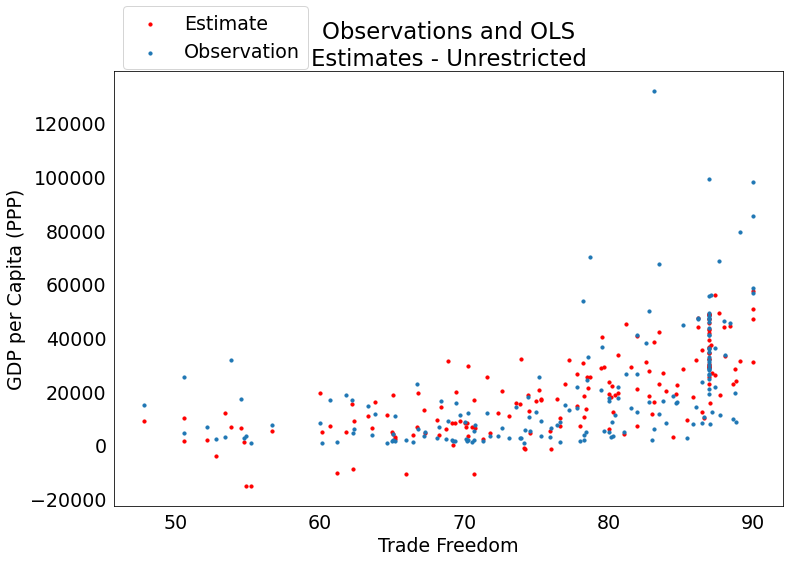

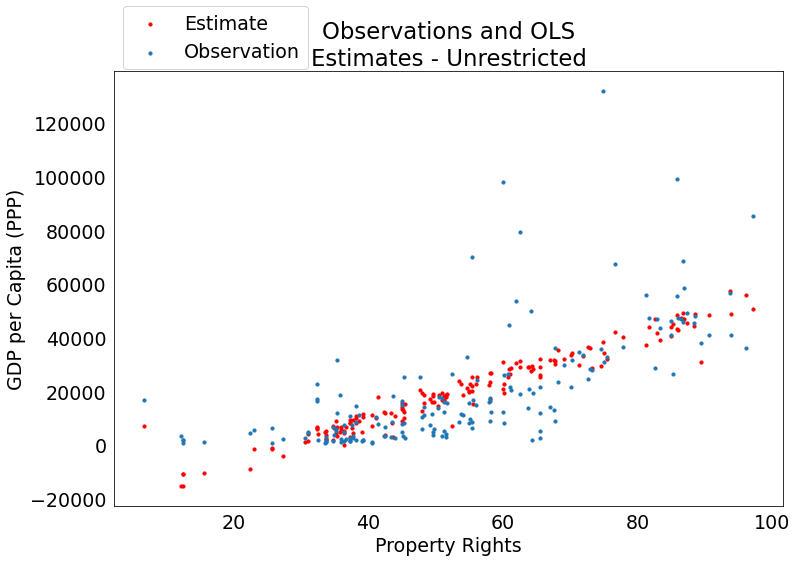

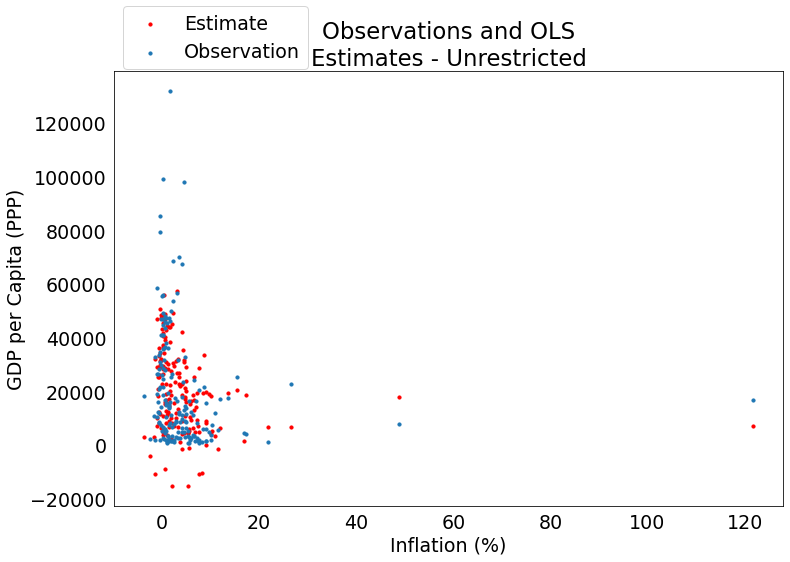

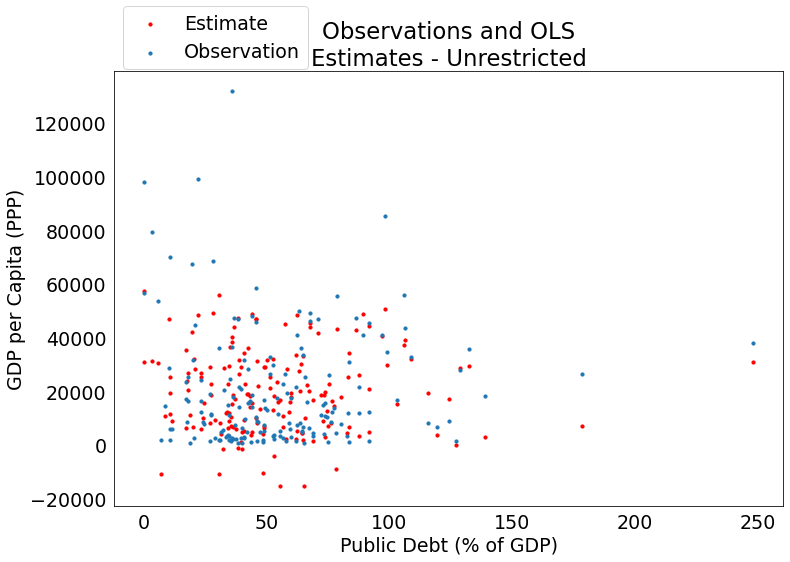

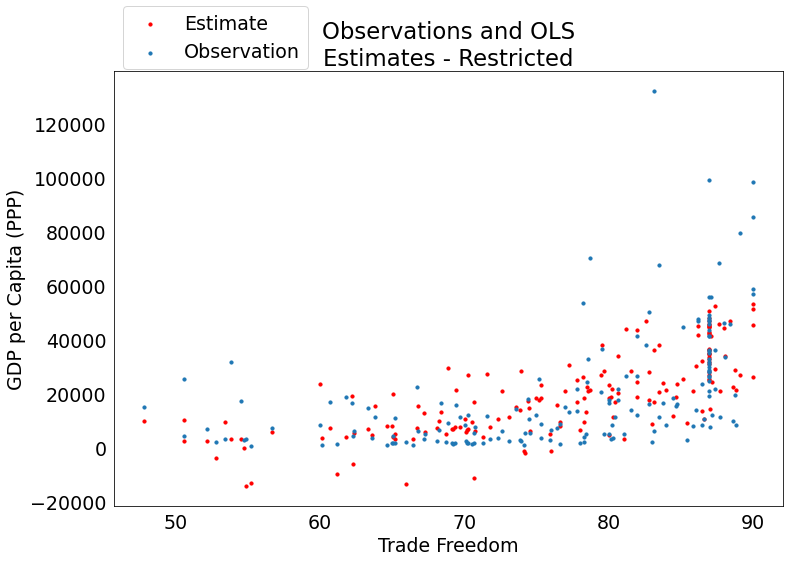

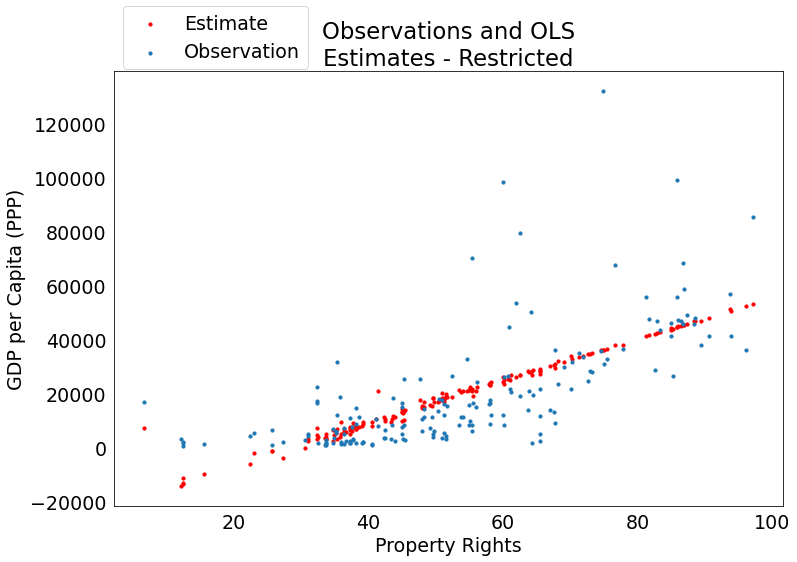

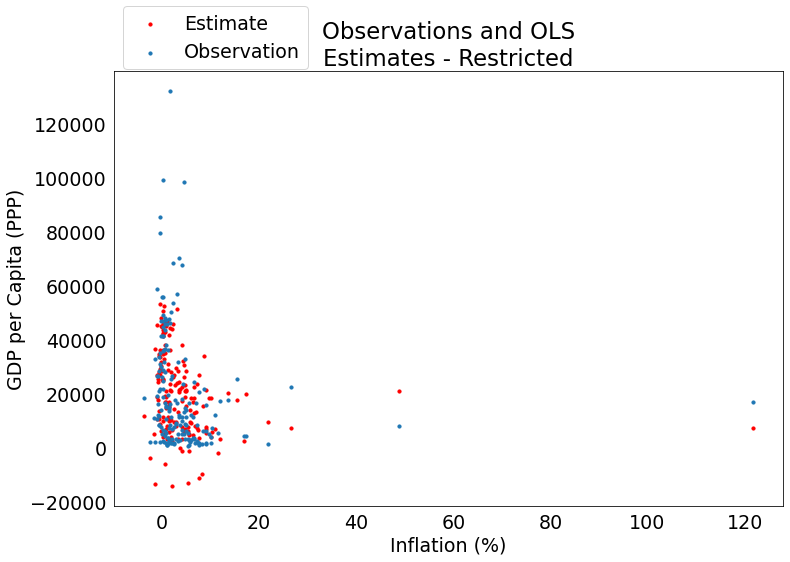

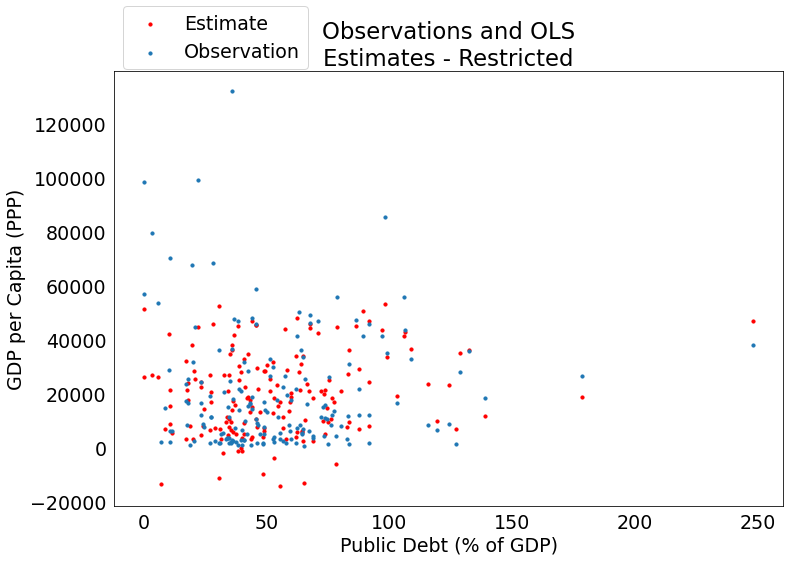

In [52]:
# . . . 
pp = PdfPages("RegressionPlots.pdf")

y_var = ["GDP per Capita (PPP)"]  
x_vars_unrestricted = ["Trade Freedom", "Property Rights", "Inflation (%)",
          "Public Debt (% of GDP)"]  
x_vars_restricted = ["Trade Freedom", "Property Rights", "Inflation (%)"]  
reg.OLS("GDP Per Capita Unrestricted", data, y_var, x_vars_unrestricted)
reg.OLS("GDP Per Capita Restricted", data, y_var, x_vars_restricted)  
reg_name = "GDP Per Capita Unrestricted"
plot_scatter_with_estimator("Observations and OLS\nEstimates - Unrestricted", reg.reg_history[reg_name]\
                            ["Data"], x_vars, y_var, pp)
reg_name = "GDP Per Capita Restricted"
plot_scatter_with_estimator("Observations and OLS\nEstimates - Restricted", reg.reg_history[reg_name]\
                            ["Data"], x_vars, y_var, pp)

pp.close()

#plot_scatter_with_estimator("Plot", reg.data, x_vars, y_var)